In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

/usr/local/lib64/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [36]:
meteorites = pd.read_csv("data/results/meteorites_unweighted.csv", index_col=0)
meteorites.head()

,id,recclass,mass,fell_found,year,latitude,longitude,group,chondrite,type,lvl3,lvl4,lc_sample,weights
1,1,L5,21.0,Fell,1880,50.77500,6.08333,L,Chondrite,Stony,Ordinary,L,11,0.000000
2,2,H6,720.0,Fell,1951,56.18333,10.23333,H,Chondrite,Stony,Ordinary,H,1,0.029498
3,4,H5,331.0,Found,1982,26.80000,-105.41667,H,Chondrite,Stony,Ordinary,H,2,0.064345
4,5,H3-6,21100.0,Found,1951,36.30000,-104.28333,H,Chondrite,Stony,Ordinary,H,13,0.016629
5,6,EH4,107000.0,Fell,1952,54.21667,-113.00000,EH,Chondrite,Stony,Enstatite,EH-EL,1,0.029498


In [37]:
meteorites = meteorites.drop(columns=["id","recclass", "weights", 'lvl3', 'lvl4'])

In [38]:
meteorites.head()

,mass,fell_found,year,latitude,longitude,group,chondrite,type,lc_sample
1,21.0,Fell,1880,50.77500,6.08333,L,Chondrite,Stony,11
2,720.0,Fell,1951,56.18333,10.23333,H,Chondrite,Stony,1
3,331.0,Found,1982,26.80000,-105.41667,H,Chondrite,Stony,2
4,21100.0,Found,1951,36.30000,-104.28333,H,Chondrite,Stony,13
5,107000.0,Fell,1952,54.21667,-113.00000,EH,Chondrite,Stony,1


In [33]:
#create dummy variables

meteorite_dummy = pd.get_dummies(meteorites)

In [40]:
Data = StandardScaler().fit_transform(meteorite_dummy)

db = DBSCAN(eps = .3, min_samples = 10).fit(Data)
db

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [43]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[1:10]

array([False, False, False, False, False, False, False, False, False])

In [44]:
db.core_sample_indices_[1:20]

array([ 5,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25])

In [45]:
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask[1:10]

array([False, False,  True, False,  True, False,  True, False,  True])

In [46]:
labels = db.labels_

In [47]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 42


In [49]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Data, labels))

Silhouette Coefficient: 0.462


In [50]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

In [51]:
indexes= zip(unique_labels, colors )
list(indexes)

[(0, array([0.61960784, 0.00392157, 0.25882353, 1.        ])),
 (1, array([0.67035755, 0.06020761, 0.27081892, 1.        ])),
 (2, array([0.72110727, 0.11649366, 0.2828143 , 1.        ])),
 (3, array([0.77185698, 0.1727797 , 0.29480969, 1.        ])),
 (4, array([0.82260669, 0.22906574, 0.30680507, 1.        ])),
 (5, array([0.8567474 , 0.27566321, 0.30149942, 1.        ])),
 (6, array([0.88535179, 0.31903114, 0.29042676, 1.        ])),
 (7, array([0.91395617, 0.36239908, 0.27935409, 1.        ])),
 (8, array([0.94256055, 0.40576701, 0.26828143, 1.        ])),
 (9, array([0.96101499, 0.45743945, 0.27658593, 1.        ])),
 (10, array([0.96931949, 0.51741638, 0.30426759, 1.        ])),
 (11, array([0.97900807, 0.58738947, 0.33656286, 1.        ])),
 (12, array([0.98731257, 0.6473664 , 0.36424452, 1.        ])),
 (13, array([0.99254133, 0.70157632, 0.39653979, 1.        ])),
 (14, array([0.99346405, 0.74771242, 0.43529412, 1.        ])),
 (15, array([0.99438677, 0.79384852, 0.47404844, 1

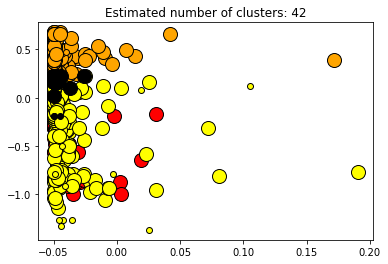

In [52]:
import matplotlib.pyplot as plt
colors=['red','yellow','orange','black']
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'black'

    class_member_mask = (labels == k)

    match = Data[class_member_mask & core_samples_mask]
    plt.plot(match[:, 0], match[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)

    nomatch = Data[class_member_mask & ~core_samples_mask]
    plt.plot(nomatch[:, 0], nomatch[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [53]:
# DBScan Clustering didn't give much information of use.